In [1]:
# import needed libraries
import sys
import os 
import pickle
from collections import OrderedDict
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd
# path of local project
folder_path = "/home/jiaxiangyi/Documents/rvesimulator"
sys.path.insert(0, folder_path) 

# import local packages and functions 
import rvesimulator 
from rvesimulator.simulators.pnas_composite import PnasRVE
from rvesimulator.design_of_experiment.samplers import FixNumberSampler
from rvesimulator.simulators.path_generator import PathGenerator

In [2]:
# create the doe
# define the design space
doe_variables = OrderedDict({"vol_req": 0.30,"control_points": 2})

# define number of samples
num_points = 1
# define the information of outputs
name_outputs = ["vol_frac", "strain", "stress", "plastic_energy"]
doe_sampler = FixNumberSampler()
doe_sampler.sampling(
    num_samples=num_points,
    design_space=doe_variables,
    out_names=name_outputs,
    seed=123456,
)
data = doe_sampler.data
print(data)

{'samples':    vol_req  control_points
0      0.3             2.0, 'responses':   vol_frac strain stress plastic_energy
0      NaN    NaN    NaN            NaN}


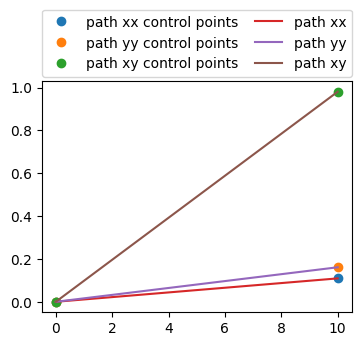

{'samples':    vol_req  control_points                                         loads_path
0      0.3             2.0  [[0.0, 0.010912340614358617, 0.021824681228717..., 'responses':   vol_frac strain stress plastic_energy
0      NaN    NaN    NaN            NaN}


In [3]:
#
loads_path_temp = np.empty([num_points, 1])
loads_path_temp[:] = np.nan
# print(loads_path_temp)
loads_path = pd.DataFrame(loads_path_temp, columns=["loads_path"])
loads_path["loads_path"] = loads_path["loads_path"].astype(object)
# print(loads_path)

# define the path generator
for ii in range(num_points):
    path_generator = PathGenerator(num_control_points=data["samples"].at[ii, "control_points"],num_increment=10)   
    loads_path.iloc[ii, 0] = path_generator.linear_interpolate()
    path_generator.plot_path()

# add the loads path to the samples
data["samples"] = pd.concat(
    [data["samples"], loads_path], axis=1, join="inner"
)
print(data)

# yield criterion 1 
- yield function 
$y=0.5+0.2\exp{(\bar\epsilon)}^{0.4}$


In [4]:
simulation_wrapper = PnasRVE()
simulation_wrapper.update_sim_info( mesh_partition=100, 
                                    yield_factor_1=0.5,
                                    yield_factor_2=0.2, 
                                    yield_factor_3=0.4,
                                    print_info=True)

geometry information of RVE: {'length': 0.048, 'width': 0.048, 'radius_mu': 0.003, 'radius_std': 0}
vol_req is: 0.3
Info of Abaqus simulation : {'mesh_partition': 100, 'loads': [0.02, 0.02, 0.02], 'time_period': 1.0, 'loads_path': None, 'E_matrix': 100.0, 'Pr_matrix': 0.3, 'yield_table_matrix': [[0.5, 0.5316978638492222, 0.541825582103651, 0.5491901897169873, 0.5551891864584486, 0.5603417633654516, 0.5649068444639842, 0.5690349813196016, 0.5728225681210433, 0.5763355781923636, 0.5796214341106994, 0.5827155324558011, 0.585645094733533, 0.5884315702256371, 0.5910922039712734, 0.5936410984009242, 0.5960899547185146, 0.5984486044506366, 0.6007253992982465, 0.6029275027715475, 0.6050611121761507, 0.6071316302061533, 0.6091437994192216, 0.6111018089314695, 0.6130093800197907, 0.6148698354997035, 0.616686156474797, 0.6184610291500892, 0.6201968837498333, 0.6218959271038169, 0.6235601701134824, 0.6251914510450486, 0.6267914553968891, 0.6283617329355872, 0.6299037123771667, 0.6314187140982368, 

In [5]:
results = simulation_wrapper.run_simulation(data=data.copy(),save_source_files=False)
simulation_wrapper.save_data('yield_criterion_1.pickle')


Time of generate the 2D RVE with volume fraction            = 0.31  is 0.02 s
micro-structure be generated successfully

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/pnas_composite/different_yield_criteria/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<11 out of 30 licenses remain available>.


the simulation time is :40.00808930397034 !
the simulation time is :60.01985692977905 !
the simulation time is :80.01983857154846 !
the simulation time is :100.01988339424133 !
the simulation time is :120.0199966430664 !
the simulation time is :140.01995944976807 !
the simulation time is :160.0198302268982 !
the simulation time is :180.02012252807617 !
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 200.08062195777893
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<11 out of 30 licenses remain available>.


# yield criterion 2
- yield function 
$y=0.1+0.2\exp{(\bar\epsilon)}^{0.4}$

In [6]:
simulation_wrapper.update_sim_info(mesh_partition=100, 
                                    yield_factor_1=0.1,
                                    yield_factor_2=0.2, 
                                    yield_factor_3=0.4,
                                    print_info=True)

geometry information of RVE: {'length': 0.048, 'width': 0.048, 'radius_mu': 0.003, 'radius_std': 0}
vol_req is: 0.3
Info of Abaqus simulation : {'mesh_partition': 100, 'loads': [0.02, 0.02, 0.02], 'time_period': 1.0, 'loads_path': None, 'E_matrix': 100.0, 'Pr_matrix': 0.3, 'yield_table_matrix': [[0.1, 0.13169786384922227, 0.14182558210365093, 0.14919018971698728, 0.1551891864584486, 0.16034176336545164, 0.16490684446398418, 0.16903498131960165, 0.1728225681210432, 0.17633557819236353, 0.17962143411069947, 0.18271553245580105, 0.18564509473353297, 0.1884315702256371, 0.19109220397127336, 0.1936410984009241, 0.1960899547185145, 0.19844860445063667, 0.2007253992982465, 0.20292750277154756, 0.2050611121761507, 0.20713163020615333, 0.20914379941922157, 0.21110180893146946, 0.21300938001979067, 0.2148698354997035, 0.21668615647479691, 0.2184610291500892, 0.22019688374983326, 0.22189592710381686, 0.2235601701134824, 0.22519145104504856, 0.22679145539688908, 0.22836173293558715, 0.229903712377

In [7]:
results = simulation_wrapper.run_simulation(data=data.copy(),save_source_files=False)
simulation_wrapper.save_data('yield_criterion_2.pickle')

remove results succesfully 

micro-structure file already exist

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/pnas_composite/different_yield_criteria/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<11 out of 30 licenses remain available>.


the simulation time is :40.006813287734985 !
the simulation time is :60.01891899108887 !
the simulation time is :80.01894664764404 !
the simulation time is :100.00307202339172 !
the simulation time is :120.0190417766571 !
the simulation time is :140.01949381828308 !
the simulation time is :160.01910138130188 !
the simulation time is :180.0191957950592 !
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 200.07574558258057
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<12 out of 30 licenses remain available>.


# yield criterion 3
- yield function 
$y=1+1\exp{(\bar\epsilon)}^{0.4}$


In [8]:
simulation_wrapper.update_sim_info(mesh_partition=100, 
                                    yield_factor_1=1,
                                    yield_factor_2=1, 
                                    yield_factor_3=0.4,
                                    print_info=True)

geometry information of RVE: {'length': 0.048, 'width': 0.048, 'radius_mu': 0.003, 'radius_std': 0}
vol_req is: 0.3
Info of Abaqus simulation : {'mesh_partition': 100, 'loads': [0.02, 0.02, 0.02], 'time_period': 1.0, 'loads_path': None, 'E_matrix': 100.0, 'Pr_matrix': 0.3, 'yield_table_matrix': [[1.0, 1.1584893192461114, 1.2091279105182546, 1.2459509485849363, 1.275945932292243, 1.3017088168272581, 1.3245342223199208, 1.3451749065980083, 1.364112840605216, 1.3816778909618175, 1.3981071705534973, 1.413577662279005, 1.4282254736676647, 1.4421578511281856, 1.4554610198563667, 1.4682054920046206, 1.4804497735925723, 1.4922430222531833, 1.5036269964912325, 1.5146375138577377, 1.5253055608807533, 1.5356581510307667, 1.5457189970961078, 1.5555090446573474, 1.5650469000989533, 1.5743491774985174, 1.5834307823739846, 1.592305145750446, 1.6009844187491662, 1.6094796355190844, 1.617800850567412, 1.6259572552252428, 1.6339572769844453, 1.6418086646779355, 1.6495185618858332, 1.6570935704911838, 1.

In [9]:
results = simulation_wrapper.run_simulation(data=data.copy(),save_source_files=False)
simulation_wrapper.save_data('yield_criterion_3.pickle')

remove results succesfully 

micro-structure file already exist

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/pnas_composite/different_yield_criteria/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<12 out of 30 licenses remain available>.


the simulation time is :40.00491285324097 !
the simulation time is :60.01687812805176 !
the simulation time is :80.01996850967407 !
the simulation time is :100.02041625976562 !
the simulation time is :120.01708316802979 !
the simulation time is :140.02061796188354 !
the simulation time is :160.0005714893341 !
the simulation time is :180.01857614517212 !
the simulation time is :200.0174045562744 !
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 220.0880527496338
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<12 out of 30 licenses remain available>.


# yield criterion 4
- yield function 
$y=1+10\exp{(\bar\epsilon)}^{0.4}$


In [10]:
simulation_wrapper.update_sim_info(mesh_partition=100, 
                                    yield_factor_1=1,
                                    yield_factor_2=10, 
                                    yield_factor_3=0.4,
                                    print_info=True)

geometry information of RVE: {'length': 0.048, 'width': 0.048, 'radius_mu': 0.003, 'radius_std': 0}
vol_req is: 0.3
Info of Abaqus simulation : {'mesh_partition': 100, 'loads': [0.02, 0.02, 0.02], 'time_period': 1.0, 'loads_path': None, 'E_matrix': 100.0, 'Pr_matrix': 0.3, 'yield_table_matrix': [[1.0, 2.5848931924611134, 3.0912791051825463, 3.459509485849363, 3.75945932292243, 4.017088168272581, 4.245342223199208, 4.451749065980082, 4.641128406052161, 4.816778909618176, 4.981071705534973, 5.135776622790051, 5.282254736676647, 5.421578511281855, 5.554610198563667, 5.682054920046205, 5.804497735925724, 5.922430222531833, 6.036269964912325, 6.146375138577377, 6.253055608807534, 6.356581510307667, 6.457189970961078, 6.555090446573473, 6.650469000989533, 6.743491774985174, 6.834307823739845, 6.923051457504459, 7.009844187491662, 7.094796355190843, 7.178008505674119, 7.259572552252427, 7.3395727698444535, 7.418086646779356, 7.495185618858333, 7.570935704911838, 7.6453980594897395, 7.71862945

In [11]:
results = simulation_wrapper.run_simulation(data=data.copy(),save_source_files=False)
simulation_wrapper.save_data('yield_criterion_4.pickle')

remove results succesfully 

micro-structure file already exist

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/pnas_composite/different_yield_criteria/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<12 out of 30 licenses remain available>.


the simulation time is :40.00894236564636 !
the simulation time is :60.01873779296875 !
the simulation time is :80.0187873840332 !
the simulation time is :100.00923728942871 !
the simulation time is :120.01883888244629 !
the simulation time is :140.01417303085327 !
the simulation time is :160.02015089988708 !
the simulation time is :180.01877212524414 !
the simulation time is :200.01883459091187 !
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 220.08618021011353
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<12 out of 30 licenses remain available>.


# plot all results together 

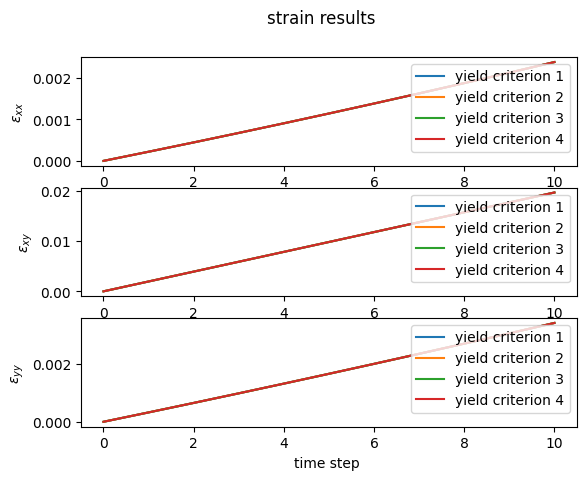

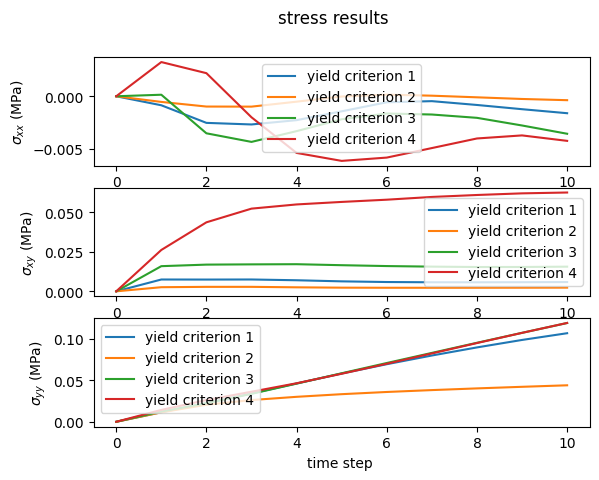

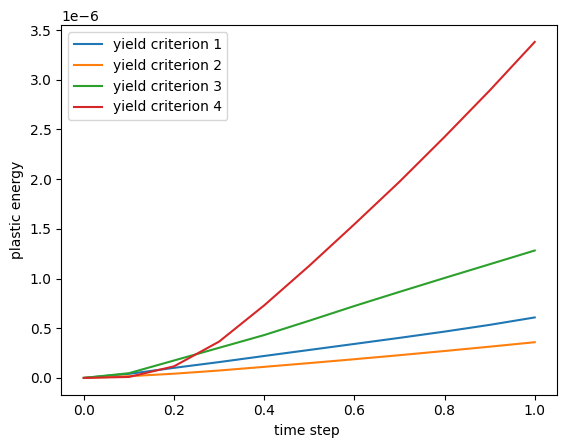

In [13]:
with open("yield_criterion_1.pickle", "rb") as fd:
    yield_criterion_1 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("yield_criterion_2.pickle", "rb") as fd:
    yield_criterion_2 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("yield_criterion_3.pickle", "rb") as fd:
    yield_criterion_3 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("yield_criterion_4.pickle", "rb") as fd:
    yield_criterion_4 = pickle.load(fd, fix_imports=True, encoding="latin1")

results_1 =yield_criterion_1["responses"]
results_2 =yield_criterion_2["responses"]
results_3 =yield_criterion_3["responses"]
results_4 =yield_criterion_4["responses"]
# result of benchmark1
stress_1 = results_1["stress"].iloc[0]
strain_1 = results_1["strain"].iloc[0]
plastic_energy_1 = results_1["plastic_energy"].iloc[0]
# result of benchmark2
stress_2 = results_2["stress"].iloc[0]
strain_2 = results_2["strain"].iloc[0]
plastic_energy_2 = results_2["plastic_energy"].iloc[0]

# result of benchmark3
stress_3 = results_3["stress"].iloc[0]
strain_3 = results_3["strain"].iloc[0]
plastic_energy_3 = results_3["plastic_energy"].iloc[0]

# result of benchmark4
stress_4 = results_4["stress"].iloc[0]
strain_4 = results_4["strain"].iloc[0]
plastic_energy_4 = results_4["plastic_energy"].iloc[0]


pparam = dict(xlabel='time step ', ylabel="$\epsilon_{xx}$")
fig, ax = plt.subplots(3,1)
ax[0].plot(strain_1[:, 0, 0], label="yield criterion 1") 
ax[0].plot(strain_2[:, 0, 0], label="yield criterion 2") 
ax[0].plot(strain_3[:, 0, 0], label="yield criterion 3") 
ax[0].plot(strain_4[:, 0, 0], label="yield criterion 4") 
ax[0].legend()
ax[0].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\epsilon_{xy}$")
ax[1].plot(strain_1[:, 0, 1], label="yield criterion 1")
ax[1].plot(strain_2[:, 0, 1], label="yield criterion 2")
ax[1].plot(strain_3[:, 0, 1], label="yield criterion 3")
ax[1].plot(strain_4[:, 0, 1], label="yield criterion 4")
ax[1].legend()
ax[1].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\epsilon_{yy}$")
ax[2].plot(strain_1[:, 1, 1], label="yield criterion 1") 
ax[2].plot(strain_2[:, 1, 1], label="yield criterion 2") 
ax[2].plot(strain_3[:, 1, 1], label="yield criterion 3") 
ax[2].plot(strain_4[:, 1, 1], label="yield criterion 4") 
ax[2].legend()
ax[2].set(**pparam)
fig.suptitle('strain results')
plt.savefig('strain.png', dpi=300)

pparam = dict(xlabel='time step ', ylabel="$\sigma_{xx}$ (MPa)")
fig, ax = plt.subplots(3,1)
ax[0].plot(stress_1[:, 0, 0], label="yield criterion 1") 
ax[0].plot(stress_2[:, 0, 0], label="yield criterion 2") 
ax[0].plot(stress_3[:, 0, 0], label="yield criterion 3") 
ax[0].plot(stress_4[:, 0, 0], label="yield criterion 4") 
ax[0].legend()
ax[0].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\sigma_{xy}$ (MPa)")
ax[1].plot(stress_1[:, 1, 0], label="yield criterion 1")
ax[1].plot(stress_2[:, 1, 0], label="yield criterion 2")
ax[1].plot(stress_3[:, 1, 0], label="yield criterion 3")
ax[1].plot(stress_4[:, 1, 0], label="yield criterion 4")
ax[1].legend()
ax[1].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\sigma_{yy}$ (MPa)")
ax[2].plot(stress_1[:, 1, 1], label="yield criterion 1") 
ax[2].plot(stress_2[:, 1, 1], label="yield criterion 2") 
ax[2].plot(stress_3[:, 1, 1], label="yield criterion 3") 
ax[2].plot(stress_4[:, 1, 1], label="yield criterion 4") 
ax[2].legend()
ax[2].set(**pparam)
fig.suptitle('stress results')
# plt.show()
plt.savefig('stress.png', dpi=300)


pparam = dict(xlabel='time step ', ylabel="plastic energy")
fig, ax = plt.subplots()
ax.plot(plastic_energy_1[:,0], plastic_energy_1[:,1], label="yield criterion 1") 
ax.plot(plastic_energy_2[:,0], plastic_energy_2[:,1], label="yield criterion 2") 
ax.plot(plastic_energy_3[:,0], plastic_energy_3[:,1], label="yield criterion 3") 
ax.plot(plastic_energy_4[:,0], plastic_energy_4[:,1], label="yield criterion 4") 
ax.legend()
ax.set(**pparam)
plt.savefig('energy.png', dpi=300)